In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드
file_path = '/content/drive/MyDrive/취업 프로젝트/관악구 부동산 예측 프로젝트/전처리된_서울시_관악구_부동산_모델_타겟.csv'
file_path2 = '/content/drive/MyDrive/취업 프로젝트/관악구 부동산 예측 프로젝트/전처리된_서울시_관악구_부동산_모델_피처.csv'
target = pd.read_csv(file_path)
features = pd.read_csv(file_path2)

In [ ]:
target.head()

,물건금액(만원)
0,22200.0
1,40500.0
2,10000.0
3,16700.0
4,24200.0


In [ ]:
features.head()

,건물면적(㎡),토지면적(㎡),층,건축년도,연도,월,분기,요일,건물면적(평),평당 가격(만원),건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,법정동명_남현동,법정동명_봉천동,법정동명_상도동,법정동명_신림동,지번구분명_대지,지번구분명_블럭,지번구분명_산
0,-0.252120,0.282069,-0.830766,-1.381709,2024.0,10.0,4.0,1.0,14.890909,1490.842491,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.669029,-0.730008,-0.639389,1.684247,2024.0,10.0,4.0,1.0,11.896970,3404.228222,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-1.235317,0.149579,-0.448013,0.151269,2024.0,10.0,4.0,0.0,7.830303,1277.089783,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.177085,-1.926099,-0.256636,-0.615220,2024.0,10.0,4.0,5.0,8.248485,2024.614254,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.767349,1.387074,-0.065260,0.589263,2024.0,10.0,4.0,5.0,11.190909,2162.469537,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# 랜덤 포레스트 회귀 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 29103.1401058138
R-squared: 0.999825578768465


# 테스트 사이즈 0.2 -> 0.3 으로 늘려보기

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Step 2: 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: 예측 및 평가
y_pred = rf_model.predict(X_test)

# Step 4: 평가 (MAE와 R²)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 67.44526682649618
R² Score: 0.9997661651204582


# 과적합 방지를 위한 모델 단순화

In [ ]:
# step 1:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: 예측 및 평가
y_pred = rf_model.predict(X_test)

# Step 3: 평가 (MAE와 R²)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 80.60431973938094
R² Score: 0.9996647118277819


# 교차 검증 수행

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, features, target, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean Cross-Validation R² Score: {scores.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validation R² Scores: [0.97392405 0.99945909 0.99947887 0.99910519 0.99618429]
Mean Cross-Validation R² Score: 0.9936302980939095


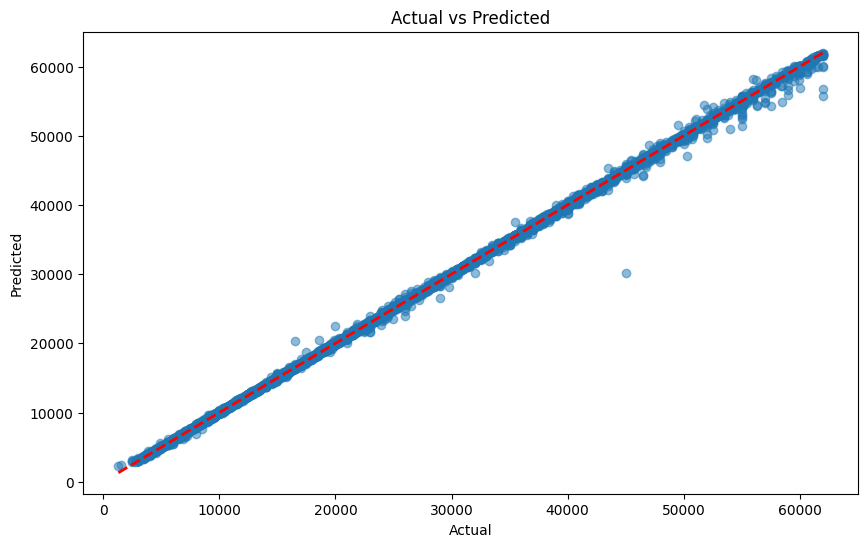

In [ ]:
import matplotlib.pyplot as plt

# 예측 값과 실제 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# 잔차 분석


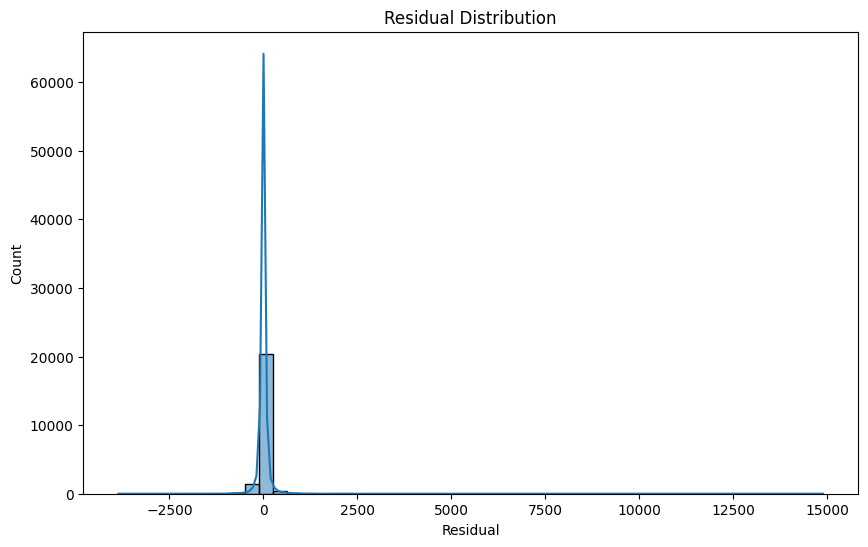

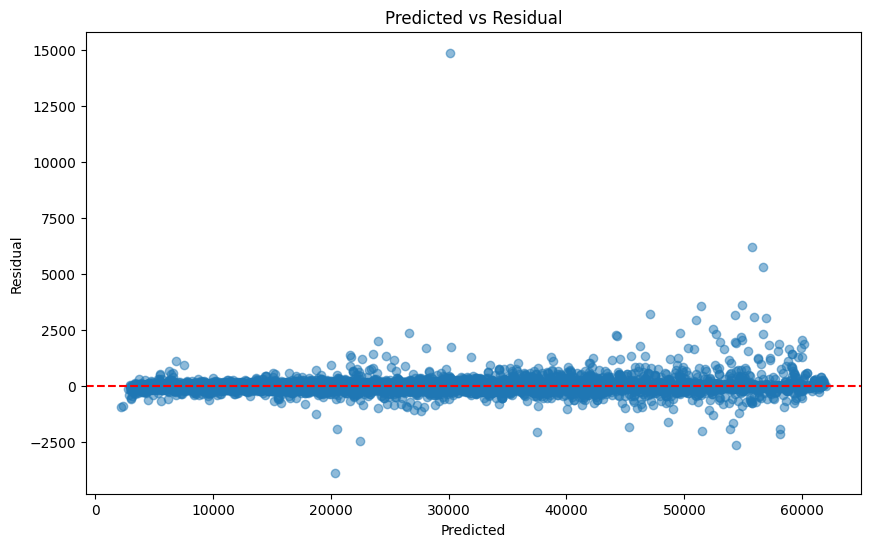

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 잔차 계산
# Extract the values from the '물건금액(만원)' column of y_test
# and convert to a 1-dimensional NumPy array.
residuals = y_test['물건금액(만원)'].values - y_pred

# 잔차 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()

# 잔차 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Predicted vs Residual')
plt.show()

# 특정 샘플 측정

In [ ]:
# 테스트 데이터에서 첫 10개 샘플 예측 확인
num_samples = 10
sample_data = X_test[:num_samples]
sample_actual = y_test[:num_samples]
sample_predicted = rf_model.predict(sample_data)

# 출력
for i in range(num_samples):
    print(f"Sample {i+1}: Actual = {sample_actual.iloc[i]}, Predicted = {sample_predicted[i]}")


Sample 1: Actual = 물건금액(만원)    57000.0
Name: 73748, dtype: float64, Predicted = 57292.0
Sample 2: Actual = 물건금액(만원)    29800.0
Name: 67842, dtype: float64, Predicted = 29814.5
Sample 3: Actual = 물건금액(만원)    27000.0
Name: 52074, dtype: float64, Predicted = 26804.5
Sample 4: Actual = 물건금액(만원)    13500.0
Name: 53610, dtype: float64, Predicted = 13482.5
Sample 5: Actual = 물건금액(만원)    30200.0
Name: 23602, dtype: float64, Predicted = 30102.5
Sample 6: Actual = 물건금액(만원)    24000.0
Name: 38961, dtype: float64, Predicted = 23974.5
Sample 7: Actual = 물건금액(만원)    10000.0
Name: 10570, dtype: float64, Predicted = 10103.9
Sample 8: Actual = 물건금액(만원)    12500.0
Name: 16598, dtype: float64, Predicted = 12509.5
Sample 9: Actual = 물건금액(만원)    9500.0
Name: 32789, dtype: float64, Predicted = 9496.93
Sample 10: Actual = 물건금액(만원)    15530.0
Name: 27183, dtype: float64, Predicted = 15505.0


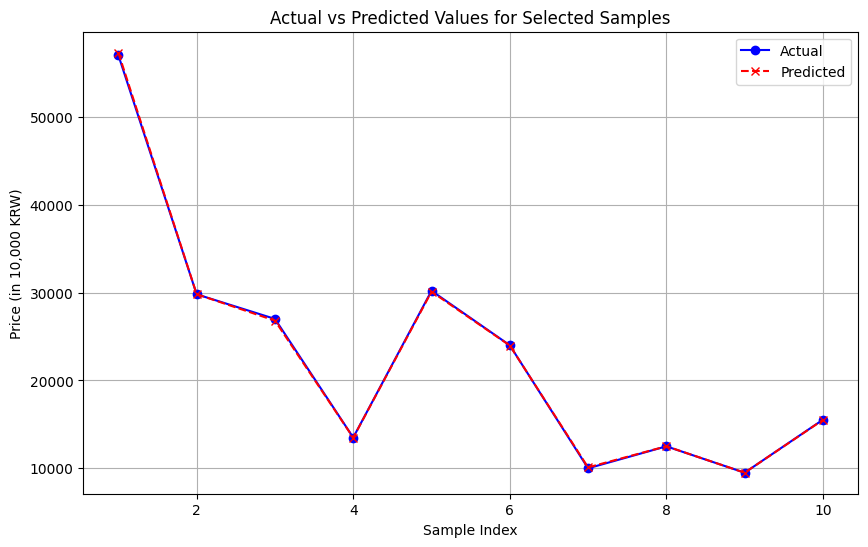

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값과 예측 값 데이터
actual_values = [57000.0, 29800.0, 27000.0, 13500.0, 30200.0, 24000.0, 10000.0, 12500.0, 9500.0, 15530.0]
predicted_values = [57292.0, 29814.5, 26804.5, 13482.5, 30102.5, 23974.5, 10103.9, 12509.5, 9496.93, 15505.0]

# 샘플 인덱스
sample_indices = np.arange(1, 11)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, actual_values, marker='o', label='Actual', linestyle='-', color='b')
plt.plot(sample_indices, predicted_values, marker='x', label='Predicted', linestyle='--', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Price (in 10,000 KRW)')
plt.title('Actual vs Predicted Values for Selected Samples')
plt.legend()
plt.grid(True)
plt.show()


# 성능 지표 계산

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 38806.7627704715
Root Mean Squared Error (RMSE): 196.99432167062963
Mean Absolute Error (MAE): 67.44526682649618


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import joblib

# 모델 저장
joblib.dump(rf_model, '/content/drive/MyDrive/취업 프로젝트/관악구 부동산 예측 프로젝트/final_random_forest_model.pkl')

['/content/drive/MyDrive/취업 프로젝트/관악구 부동산 예측 프로젝트/final_random_forest_model.pkl']